# Model Building

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor

In [2]:
to_filter_df = pd.read_csv('../Dataset/New_Data/13_for_modeling.csv')

In [3]:
to_filter_df

,posted_date,main_city,price_land_pp,dist_hospital,dist_school,dist_railway,dist_bus_stop,dist_road
0,1/2/2018,rajagiriya,1600000.0,5.300061,8.213339,4.102779,1.420663,1958.924652
1,1/13/2018,dehiwala,3000000.0,5.070248,10.252948,11.016055,2.915772,1498.262124
2,1/12/2018,homagama,285000.0,2.349762,4.485330,0.574573,2.298518,1863.774927
3,2/1/2018,malabe,1000000.0,1.435861,4.531727,10.165090,3.153121,1572.588438
4,1/24/2018,nugegoda,3250000.0,16.418694,0.342956,0.620786,1.956451,1170.203885
...,...,...,...,...,...,...,...,...
9975,3/11/2023,moratuwa,1000000.0,16.200849,3.844897,6.941428,1.646356,1284.940831
9976,3/11/2023,homagama,1325000.0,6.351348,6.885581,4.670557,2.474695,1801.094119
9977,3/11/2023,malabe,1550000.0,14.528770,0.585413,2.503993,1.394849,168.315055
9978,3/12/2023,malabe,23250000.0,0.513850,8.142392,0.013590,2.350650,80.096776


In [4]:
columns_to_keep = ['main_city', 'price_land_pp', 'dist_hospital', 'dist_school', 'dist_railway', 'dist_bus_stop', 'dist_road']
filtered_df = to_filter_df[columns_to_keep].copy()

In [7]:
filtered_df = pd.concat([filtered_df, filtered_df], ignore_index=True)

filtered_df

,main_city,price_land_pp,dist_hospital,dist_school,dist_railway,dist_bus_stop,dist_road
0,rajagiriya,1600000.0,5.300061,8.213339,4.102779,1.420663,1958.924652
1,dehiwala,3000000.0,5.070248,10.252948,11.016055,2.915772,1498.262124
2,homagama,285000.0,2.349762,4.485330,0.574573,2.298518,1863.774927
3,malabe,1000000.0,1.435861,4.531727,10.165090,3.153121,1572.588438
4,nugegoda,3250000.0,16.418694,0.342956,0.620786,1.956451,1170.203885
...,...,...,...,...,...,...,...
79835,moratuwa,1000000.0,16.200849,3.844897,6.941428,1.646356,1284.940831
79836,homagama,1325000.0,6.351348,6.885581,4.670557,2.474695,1801.094119
79837,malabe,1550000.0,14.528770,0.585413,2.503993,1.394849,168.315055
79838,malabe,23250000.0,0.513850,8.142392,0.013590,2.350650,80.096776


In [8]:
output_csv_path = '../Dataset/New_Data/14_for_dashboard.csv' 
filtered_df.to_csv(output_csv_path, index=False)

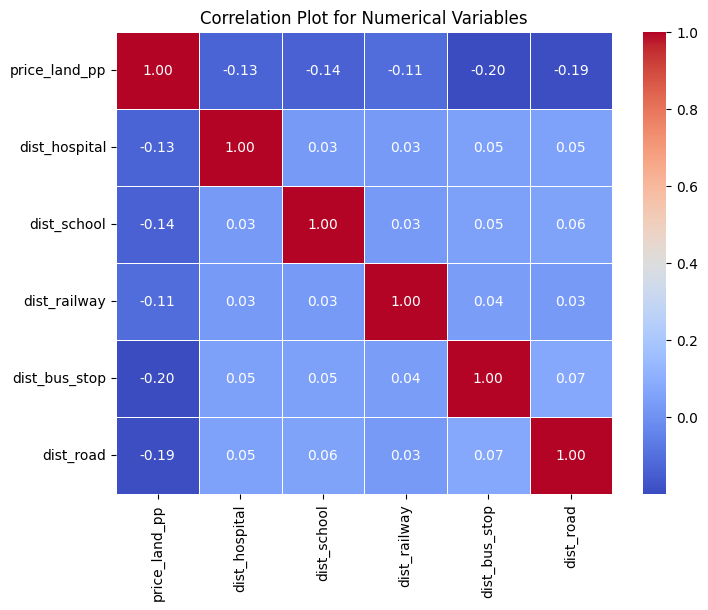

In [6]:
df = filtered_df

numerical_df = df.select_dtypes(include='number')

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Correlation Plot for Numerical Variables')
plt.show()

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR

X = filtered_df.drop('price_land_pp', axis=1)
y = filtered_df['price_land_pp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = ['main_city'] + list(X.select_dtypes(include=['object']).columns)

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

models = [
    ('RandomForest', RandomForestRegressor(), {'model__n_estimators': [50, 100, 200], 'model__max_depth': [None, 10, 20]}),
    ('GradientBoosting', GradientBoostingRegressor(), {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.01, 0.1, 0.2]}),
    ('LinearRegression', LinearRegression(), {}),
    ('XGBoost', XGBRegressor(), {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.01, 0.1, 0.2]}),
]

for model_name, model, param_grid in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', model)])

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    mean_cv_score = grid_search.best_score_

    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    print(f'{model_name} Best Hyperparameters: {best_params}')
    print(f'{model_name} Mean Cross-Validated R^2 Score: {mean_cv_score:.4f}')
    print(f'{model_name} Train R^2 Score: {train_score:.4f}')
    print(f'{model_name} Test R^2 Score: {test_score:.4f}')
    print('\n')


RandomForest Best Hyperparameters: {'model__max_depth': None, 'model__n_estimators': 100}
RandomForest Mean Cross-Validated R^2 Score: 0.6736
RandomForest Train R^2 Score: 0.9026
RandomForest Test R^2 Score: 0.5854


GradientBoosting Best Hyperparameters: {'model__learning_rate': 0.2, 'model__n_estimators': 50}
GradientBoosting Mean Cross-Validated R^2 Score: 0.6399
GradientBoosting Train R^2 Score: 0.8848
GradientBoosting Test R^2 Score: 0.6001


LinearRegression Best Hyperparameters: {}
LinearRegression Mean Cross-Validated R^2 Score: 0.1281
LinearRegression Train R^2 Score: 0.1562
LinearRegression Test R^2 Score: 0.0829


XGBoost Best Hyperparameters: {'model__learning_rate': 0.1, 'model__n_estimators': 50}
XGBoost Mean Cross-Validated R^2 Score: 0.6607
XGBoost Train R^2 Score: 0.9138
XGBoost Test R^2 Score: 0.6223




In [20]:
X = filtered_df.drop('price_land_pp', axis=1)
y = filtered_df['price_land_pp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:


numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = ['main_city'] + list(X.select_dtypes(include=['object']).columns)

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = XGBRegressor(n_estimators=50, learning_rate=0.1)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

pipeline.fit(X_train, y_train)

train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print('Train Accuracy:', train_score)
print('Test Accuracy:', test_score)

Train Accuracy: 0.8802443189169067
Test Accuracy: 0.87855260235816


In [131]:
# user_input = {}
# for feature in X.columns:
#     user_input[feature] = input(f"Enter value for {feature}: ")

# user_df = pd.DataFrame([user_input])

# predicted_price = pipeline.predict(user_df)
# print(f"Predicted price_land_pp: {predicted_price[0]}")

In [10]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = ['main_city'] + list(X_train.select_dtypes(include=['object']).columns)

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    alpha=0.0001,
    learning_rate='adaptive',
    max_iter=5000,  
    random_state=42
)

nn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

nn_pipeline.fit(X_train, y_train)

y_train_pred_nn = nn_pipeline.predict(X_train)
y_test_pred_nn = nn_pipeline.predict(X_test)

train_score_nn = r2_score(y_train, y_train_pred_nn)
test_score_nn = r2_score(y_test, y_test_pred_nn)

print('Neural Network Train R-squared:', train_score_nn)
print('Neural Network Test R-squared:', test_score_nn)


Neural Network Train R-squared: 0.9026755699751114
Neural Network Test R-squared: 0.47896194309744666


In [11]:
import numpy as np
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'model__hidden_layer_sizes': [(64, 32), (128, 64, 32), (256, 128, 64, 32)],
    'model__alpha': [0.0001, 0.001, 0.01],
    'model__learning_rate': ['constant', 'adaptive'],
}

grid_search = GridSearchCV(nn_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

best_model = grid_search.best_estimator_

y_train_pred_best = best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)

train_score_best = r2_score(y_train, y_train_pred_best)
test_score_best = r2_score(y_test, y_test_pred_best)

print('Best Neural Network Train R-squared:', train_score_best)
print('Best Neural Network Test R-squared:', test_score_best)


Best Hyperparameters: {'model__alpha': 0.001, 'model__hidden_layer_sizes': (64, 32), 'model__learning_rate': 'constant'}
Best Neural Network Train R-squared: 0.6507359897505576
Best Neural Network Test R-squared: 0.48462507119543874


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = ['main_city'] + list(X_train.select_dtypes(include=['object']).columns)

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    alpha=0.001,
    learning_rate='adaptive',
    max_iter=10000, 
    random_state=42
)

nn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

nn_pipeline.fit(X_train, y_train)

y_train_pred_nn = nn_pipeline.predict(X_train)
y_test_pred_nn = nn_pipeline.predict(X_test)

train_score_nn = r2_score(y_train, y_train_pred_nn)
test_score_nn = r2_score(y_test, y_test_pred_nn)

print('Neural Network Train R-squared:', train_score_nn)
print('Neural Network Test R-squared:', test_score_nn)


Neural Network Train R-squared: 0.7623489284123872
Neural Network Test R-squared: 0.48015888323251144


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
